# Toxic Comment Classification – Complete Documentation

## 📋 Project Overview

This project focuses on detecting toxic user-generated content using deep learning techniques.

### Objective
Build a **Bag-of-Words (BOW) - TF_IDF classification model** to detect toxic comments using neural networks.

### Dataset
**Jigsaw Toxic Comment Classification Challenge**

### Dataset Characteristics
- Multi-label classification problem with **6 toxic categories**
- Highly imbalanced dataset  
  - ~90% non-toxic  
  - ~10% toxic
- Contains **159,571 training comments**


## 🧭 Approach

The workflow followed in this project includes:

- Exploratory Data Analysis (EDA) to understand label distribution
- Convert multi-label problem into binary classification (toxic vs non-toxic)
- Balance the dataset using undersampling
- Text preprocessing and cleaning
- Feature extraction using Bag-of-Words (BOW) -> Bag-of-Words (BOW) - TF_IDF
- Training a Deep Neural Network classifier

## 🔧 Installation & Imports

Installing required libraries and importing necessary modules.

```python
!pip install upsetplot

In [1]:
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=upsetplot-0.9.0-py3-none-any.whl size=24866 sha256=4fdb63d387aec990fe98ce295cf880d369fa6d13ddc1e72aaa3468c5eea61a95
  Stored in directory: /root/.cache/pip/wheels/5d/7a/54/1460364da0fe4e17c256b7a28191fa373d81292fcf73a4ddb8
Successfully built upsetplot


In [2]:
# Core data handling
import pandas as pd
import numpy as np
from collections import Counter

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from upsetplot import UpSet, from_indicators

# Text processing
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine learning & Deep learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Download required NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

2026-01-17 18:16:36.218489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768673796.511547      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768673796.594360      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768673797.269855      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768673797.269910      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768673797.269913      55 computation_placer.cc:177] computation placer alr

True

## 📂 1. Load Dataset

Loading the training and test datasets from the Kaggle competition.


In [3]:
# Load the dataset files
train_df = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv')
test_df = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv')

## 🔍 2. Exploratory Data Analysis (EDA)

Exploring the dataset to understand its structure, label distribution, and potential challenges.


In [4]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


### 2.1 Dataset Structure

Understanding the basic structure of the dataset including columns, data types, and missing values.

In [6]:
# info()
print("DATASET INFO")
train_df.info()

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
# column names
print("COLUMN NAMES ONLY")
columns = train_df.columns.tolist()
print(f"Number of columns: {len(columns)}")
print(f"Column names: {columns}")


COLUMN NAMES ONLY
Number of columns: 8
Column names: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


### 2.2 Column Type Analysis

Identifying which columns are text, numerical, or label columns.

In [8]:
# Identify categorical/text vs numerical columns
text_columns = []
numerical_columns = []
categorical_columns = []

for col in train_df.columns:
    dtype = train_df[col].dtype
    if dtype == 'object':
        text_columns.append(col)
    elif dtype in ['int64', 'float64']:
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)

print(f"Text columns ({len(text_columns)}): {text_columns}")
print(f"Numerical columns ({len(numerical_columns)}): {numerical_columns}")
print(f"Other ({len(categorical_columns)}): {categorical_columns}")

Text columns (2): ['id', 'comment_text']
Numerical columns (6): ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
Other (0): []


In [9]:
# Detailed column information including missing values
print("DETAILED COLUMN INFORMATION")
for col in train_df.columns:
    non_null = train_df[col].count()
    null_count = train_df[col].isnull().sum()
    dtype = train_df[col].dtype
    unique_count = train_df[col].nunique() if dtype != 'object' else "N/A (text)"
    print(f"\nColumn: {col}")
    print(f"  Non-null values: {non_null:,}")
    print(f"  Null values: {null_count:,}")

DETAILED COLUMN INFORMATION

Column: id
  Non-null values: 159,571
  Null values: 0

Column: comment_text
  Non-null values: 159,571
  Null values: 0

Column: toxic
  Non-null values: 159,571
  Null values: 0

Column: severe_toxic
  Non-null values: 159,571
  Null values: 0

Column: obscene
  Non-null values: 159,571
  Null values: 0

Column: threat
  Non-null values: 159,571
  Null values: 0

Column: insult
  Non-null values: 159,571
  Null values: 0

Column: identity_hate
  Non-null values: 159,571
  Null values: 0


### 2.3 Toxicity Distribution Analysis

Analyzing the distribution of toxic vs non-toxic comments to understand class imbalance.

In [10]:
# TOXICITY ANALYSIS
print("\n\n2️⃣ TOXICITY OVERVIEW")
print("-" * 40)
toxic_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Check if comment has ANY toxic label
has_toxic = train_df[toxic_columns].sum(axis=1) > 0
toxic_count = has_toxic.sum()
non_toxic_count = len(train_df) - toxic_count

print(f"📈 TOTAL COMMENTS: {len(train_df):,}")
print(f"✅ NON-TOXIC: {non_toxic_count:,} ({non_toxic_count/len(train_df)*100:.1f}%)")
print(f"❌ TOXIC: {toxic_count:,} ({toxic_count/len(train_df)*100:.1f}%)")

# Visual bar
print(f"\n📊 DISTRIBUTION VISUAL:")
non_toxic_bars = int(non_toxic_count/len(train_df)*50)
toxic_bars = int(toxic_count/len(train_df)*50)
print("█" * non_toxic_bars + f" Clean ({non_toxic_count/len(train_df)*100:.1f}%)")
print("█" * toxic_bars + f" Toxic ({toxic_count/len(train_df)*100:.1f}%)")



2️⃣ TOXICITY OVERVIEW
----------------------------------------
📈 TOTAL COMMENTS: 159,571
✅ NON-TOXIC: 143,346 (89.8%)
❌ TOXIC: 16,225 (10.2%)

📊 DISTRIBUTION VISUAL:
████████████████████████████████████████████ Clean (89.8%)
█████ Toxic (10.2%)


### 2.4 Toxic Category Distribution

Analyzing the frequency of each toxic category in the dataset.

In [11]:
# DETAILED TOXIC CATEGORIES
counts = train_df[toxic_columns].sum()
sorted_counts = counts.sort_values(ascending=False)

print("📋 TOXIC TYPES (sorted by frequency):")
print("-" * 40)
for category, count in sorted_counts.items():
    pct_total = (count / len(train_df)) * 100
    pct_toxic = (count / toxic_count) * 100 if toxic_count > 0 else 0
    # Visual indicator
    bars = int(count/len(train_df)*60)
    print(f"\n{category:15s}: {count:>6,} comments")
    print(f"  {pct_total:5.1f}% of all comments")
    print(f"  {pct_toxic:5.1f}% of toxic comments")
    print(f"  {'█' * bars}")

📋 TOXIC TYPES (sorted by frequency):
----------------------------------------

toxic          : 15,294 comments
    9.6% of all comments
   94.3% of toxic comments
  █████

obscene        :  8,449 comments
    5.3% of all comments
   52.1% of toxic comments
  ███

insult         :  7,877 comments
    4.9% of all comments
   48.5% of toxic comments
  ██

severe_toxic   :  1,595 comments
    1.0% of all comments
    9.8% of toxic comments
  

identity_hate  :  1,405 comments
    0.9% of all comments
    8.7% of toxic comments
  

threat         :    478 comments
    0.3% of all comments
    2.9% of toxic comments
  


## 📊 3. Data Visualization

Visualizing label distributions and relationships between toxic categories.

### 3.1 Category Frequency Plots

Visualizing the frequency of each toxic category using bar charts.

  
**Category Frequency Plots** focus on the **overall frequency of each toxic category** across the entire dataset.  
They answer the question: **Which toxic behaviors are most common?**  
Each label is counted independently, even if multiple labels appear in the same comment.

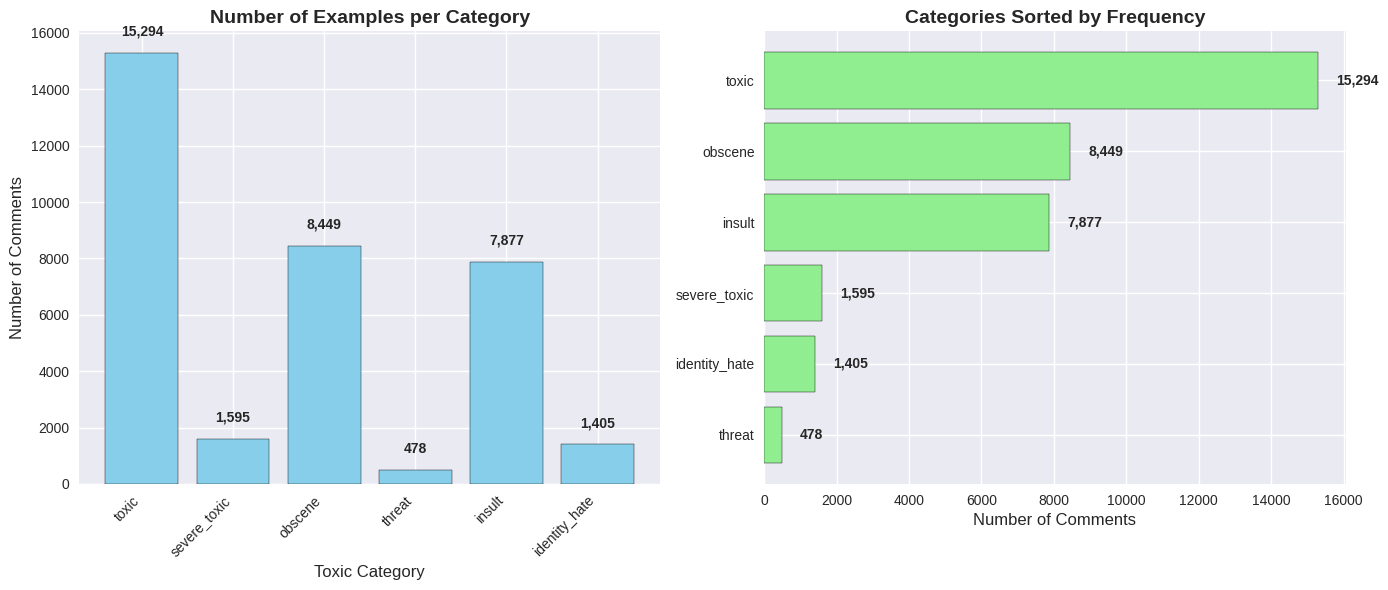

In [12]:
# Set style
plt.style.use('seaborn-v0_8')

# Calculate counts for each category
counts = train_df[toxic_columns].sum()

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


bars1 = ax1.bar(range(len(counts)), counts.values, color='skyblue', edgecolor='black')
ax1.set_title('Number of Examples per Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('Toxic Category', fontsize=12)
ax1.set_ylabel('Number of Comments', fontsize=12)
ax1.set_xticks(range(len(counts)))
ax1.set_xticklabels(counts.index, rotation=45, ha='right')

# Add count labels on top of bars
for i, (bar, count) in enumerate(zip(bars1, counts.values)):
    ax1.text(i, count + 500, f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# PLOT 2: Categories Sorted by Frequency
sorted_counts = counts.sort_values(ascending=True)
y_pos = range(len(sorted_counts))
bars2 = ax2.barh(y_pos, sorted_counts.values, color='lightgreen', edgecolor='black')
ax2.set_title('Categories Sorted by Frequency', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Comments', fontsize=12)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(sorted_counts.index)

# Add count labels on the right of bars
for i, (bar, count) in enumerate(zip(bars2, sorted_counts.values)):
    ax2.text(count + 500, i, f'{count:,}', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

### 3.2 Co-occurrence Heatmap

Visualizing how often toxic labels appear together in the same comment.

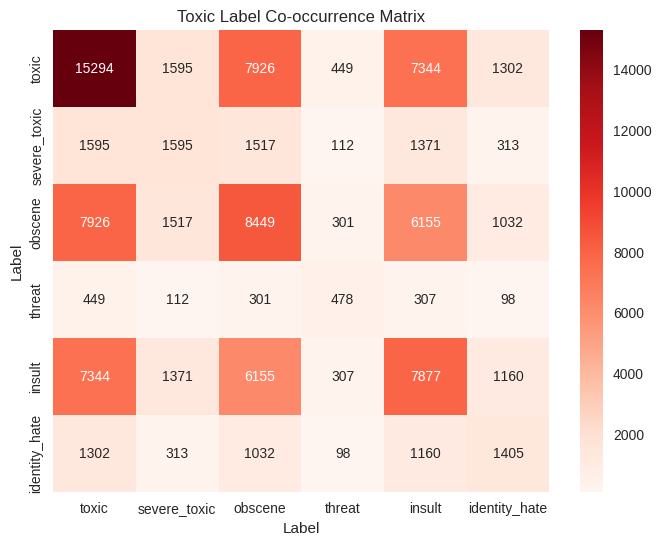

In [13]:
# Compute co-occurrence matrix
co_occurrence = train_df[toxic_columns].T.dot(train_df[toxic_columns])

plt.figure(figsize=(8,6))
sns.heatmap(
    co_occurrence,
    annot=True,
    fmt='d',
    cmap='Reds'
)

plt.title('Toxic Label Co-occurrence Matrix')
plt.xlabel('Label')
plt.ylabel('Label')
plt.show()


### 3.3 UpSet Plot – Label Overlap Analysis

Visualizing exact combinations of toxic labels.


/usr/local/lib/python3.12/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/python3.12/dist-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

<Figure size 1000x600 with 0 Axes>

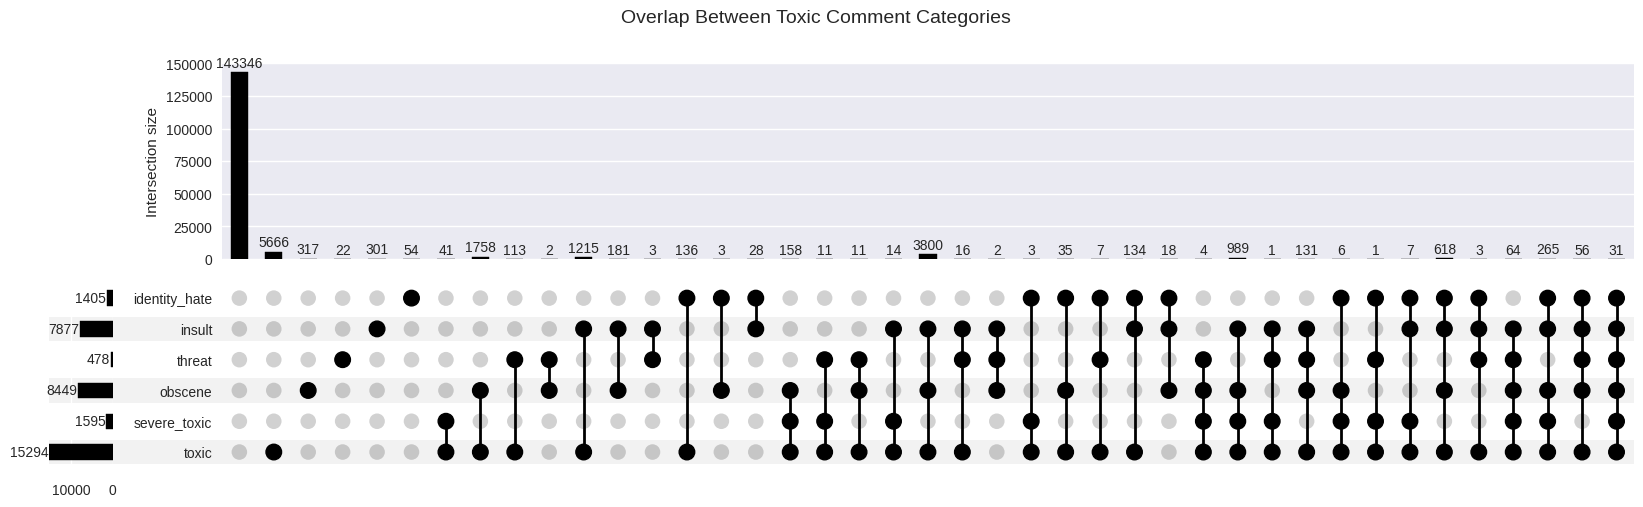

In [14]:
# Create boolean dataframe for toxic labels
label_df = train_df[toxic_columns].astype(bool)

# Convert to UpSet format
upset_data = from_indicators(toxic_columns, label_df)


plt.figure(figsize=(10,6))

UpSet(
    upset_data,
    show_counts=True,
    sort_categories_by=None
).plot()

plt.suptitle("Overlap Between Toxic Comment Categories", fontsize=14)
plt.show()


## 🔢 4. Multi-Label Analysis

Analyzing relationships and interactions between multiple toxic labels.


### 4.1 Label Count Distribution

Analyzing how many toxic labels appear in each comment.


**Label Count Distribution** focuses on the **number of toxic labels per individual comment**.  
It answers the question: **How many types of toxicity does a single comment usually contain?**  
This analysis reveals whether comments tend to be single-label or multi-label toxic.

In [15]:
# MULTI-LABEL ANALYSIS
print("\n\n4️⃣ MULTI-LABEL ANALYSIS")
print("-" * 40)

# Count labels per toxic comment
toxic_comments = train_df[has_toxic].copy()
label_counts = toxic_comments[toxic_columns].sum(axis=1)

print(f"\n📊 How many labels do toxic comments have?")
for i in range(1, 7):
    count = (label_counts == i).sum()
    pct = (count / toxic_count) * 100 if toxic_count > 0 else 0
    if count > 0:
        print(f"  {i} label(s): {count:>6,} comments ({pct:5.1f}%)")



4️⃣ MULTI-LABEL ANALYSIS
----------------------------------------

📊 How many labels do toxic comments have?
  1 label(s):  6,360 comments ( 39.2%)
  2 label(s):  3,480 comments ( 21.4%)
  3 label(s):  4,209 comments ( 25.9%)
  4 label(s):  1,760 comments ( 10.8%)
  5 label(s):    385 comments (  2.4%)
  6 label(s):     31 comments (  0.2%)


### 4.2 Top Label Combinations

Identifying the most frequent combinations of toxic labels.


In [16]:
# Most common combinations
toxic_comments['label_combo'] = toxic_comments[toxic_columns].apply(
    lambda row: '+'.join([col for col, val in zip(toxic_columns, row) if val == 1]),
    axis=1
)
top_combos = toxic_comments['label_combo'].value_counts().head(5)

for combo, count in top_combos.items():
    print(f"  {combo:<30}: {count:>6,}")

  toxic                         :  5,666
  toxic+obscene+insult          :  3,800
  toxic+obscene                 :  1,758
  toxic+insult                  :  1,215
  toxic+severe_toxic+obscene+insult:    989


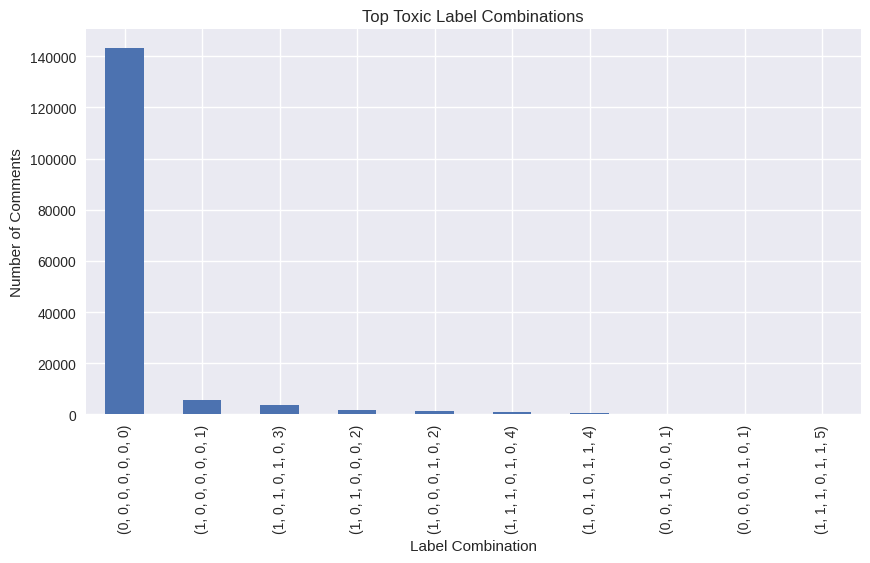

In [17]:
combo_counts = (
    train_df[toxic_columns]
    .assign(total=train_df[toxic_columns].sum(axis=1))
    .value_counts() # Count how many times each combination appears
    .head(10) # Take only the top 10 most frequent combinations
)

combo_counts.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Top Toxic Label Combinations")
plt.ylabel("Number of Comments")
plt.xlabel("Label Combination")
plt.show()


### 4.3 Pure Label Check

Checking whether each toxic category has comments containing only that label.


In [18]:
# check all labels have pure examples or not!
for category in toxic_columns:
    pure_exists = ((train_df[category] == 1) & (train_df[toxic_columns].sum(axis=1) == 1)).any()
    print(f"{category}: {'YES' if pure_exists else 'NO'}")

toxic: YES
severe_toxic: NO
obscene: YES
threat: YES
insult: YES
identity_hate: YES


## 📈 5. Key Insights Summary

Summarizing the main findings and observations from the exploratory data analysis.


In [19]:
# SUMMARY STATISTICS
print("\n\n5️⃣ KEY INSIGHTS")
print("-" * 40)
print(f"📌 Dataset is HIGHLY IMBALANCED:")
print(f"   • {non_toxic_count/len(train_df)*100:.1f}% clean vs {toxic_count/len(train_df)*100:.1f}% toxic")
print(f"   • Model that always says 'non-toxic' would be {non_toxic_count/len(train_df)*100:.1f}% accurate!")
print(f"\n📌 Most toxic comments have 1-2 labels:")
print(f"   • Average labels per toxic comment: {label_counts.mean():.2f}")
print(f"   • Most toxic: '{counts.idxmax()}' ({counts.max():,})")
print(f"   • Least toxic: '{counts.idxmin()}' ({counts.min():,})")
print(f"\n📌 Threat is the rarest type:")
print(f"   • Only {counts['threat']:,} threat comments")
print(f"   • That's just {counts['threat']/len(train_df)*100:.2f}% of all comments")



5️⃣ KEY INSIGHTS
----------------------------------------
📌 Dataset is HIGHLY IMBALANCED:
   • 89.8% clean vs 10.2% toxic
   • Model that always says 'non-toxic' would be 89.8% accurate!

📌 Most toxic comments have 1-2 labels:
   • Average labels per toxic comment: 2.16
   • Most toxic: 'toxic' (15,294)
   • Least toxic: 'threat' (478)

📌 Threat is the rarest type:
   • Only 478 threat comments
   • That's just 0.30% of all comments


## 👀 6. Sample Data Exploration

Exploring real comment examples to understand toxic language qualitatively.


### Non-Toxic Samples

These comments contain **no toxic labels**.  
They represent normal, respectful, or neutral language.

Non-toxic samples serve as **negative examples** for the model and help it learn what *acceptable* content looks like.


In [20]:
# 1. NON-TOXIC
print("SELECT NON-TOXIC EXAMPLE:")
non_toxic_examples = train_df[train_df[toxic_columns].sum(axis=1) == 0]
non_toxic_count = len(non_toxic_examples)
print(f"Found {non_toxic_count:,} non-toxic examples")
print(f"Enter example number (1-{min(10, non_toxic_count)}): ")
choice = input()
if choice.isdigit() and 1 <= int(choice) <= min(10, non_toxic_count):
    chosen = non_toxic_examples.iloc[int(choice)-1]
    print(f"\n✓ SELECTED NON-TOXIC:")
    print(f"ID: {chosen['id']}")
    print(f"Text: {chosen['comment_text']}")
    print(f"All labels = 0")
    print(f"Length: {len(chosen['comment_text'])} chars")

SELECT NON-TOXIC EXAMPLE:
Found 143,346 non-toxic examples
Enter example number (1-10): 


 6



✓ SELECTED NON-TOXIC:
ID: 00025465d4725e87
Text: "

Congratulations from me as well, use the tools well.  · talk "
All labels = 0
Length: 65 chars


### Toxic Samples (Pure)

These comments contain **exactly one toxic label**.  
Each comment represents a **single type of toxic behavior**, such as insult or obscene language.

Pure toxic samples help the model learn **distinct and isolated toxicity patterns**.

In [21]:
# 2. TOXIC CATEGORIES
for category in toxic_columns:
    print(f"\n{'='*60}")
    print(f"SELECT {category.upper()} EXAMPLE:")
    
    # Try pure examples first
    pure_examples = train_df[(train_df[category] == 1) & (train_df[toxic_columns].sum(axis=1) == 1)]
    pure_count = len(pure_examples)
    
    if pure_count > 0:
        print(f"Found {pure_count} PURE examples (only {category}=1)")
        print(f"Enter example number (1-{pure_count}): ")
        choice = input()
        if choice.isdigit() and 1 <= int(choice) <= pure_count:
            chosen = pure_examples.iloc[int(choice)-1]
            print(f"\n✓ SELECTED PURE {category.upper()}:")
            print(f"ID: {chosen['id']}")
            print(f"Text: {chosen['comment_text']}")
            print(f"Label: {category}=1, others=0")
            print(f"Length: {len(chosen['comment_text'])} chars")
    else:
        # Fall back to mixed examples
        mixed_examples = train_df[train_df[category] == 1]
        mixed_count = len(mixed_examples)
        if mixed_count > 0:
            print(f"No pure examples. Found {mixed_count} MIXED examples with {category}=1")
            print(f"Enter example number (1-{mixed_count}): ")
            choice = input()
            if choice.isdigit() and 1 <= int(choice) <= mixed_count:
                chosen = mixed_examples.iloc[int(choice)-1]
                # Find other labels
                other_labels = [col for col in toxic_columns if col != category and chosen[col] == 1]
                print(f"\n✓ SELECTED MIXED {category.upper()}:")
                print(f"ID: {chosen['id']}")
                print(f"Text: {chosen['comment_text']}")
                print(f"Main label: {category}=1")
                if other_labels:
                    print(f"Also has: {', '.join(other_labels)}")
                print(f"Length: {len(chosen['comment_text'])} chars")
        else:
            print(f"No examples found for {category}")


SELECT TOXIC EXAMPLE:
Found 5666 PURE examples (only toxic=1)
Enter example number (1-5666): 


 6



✓ SELECTED PURE TOXIC:
ID: 00637960a7ec3436
Text: "

UNBLOCK ME OR I'LL GET MY LAWYERS ON TO YOU FOR BLOCKING MY CONSTITUTIONAL RIGHT TO FREE SPEECH"
Label: toxic=1, others=0
Length: 99 chars

SELECT SEVERE_TOXIC EXAMPLE:
No pure examples. Found 1595 MIXED examples with severe_toxic=1
Enter example number (1-1595): 


 6



✓ SELECTED MIXED SEVERE_TOXIC:
ID: 020316a0de9e0406
Text: "You know, I was thinking...

Nobody really attacked me before I revealed my age here.  After I announced that I was 14, I was subject to a constant storm of harassment and abuse.

The same thing goes for when I was on The Sandbox when I was 11.  Before people knew my age, they didn't care.  After I told them my age, they hated me.

It's just so amusing how the idiot Soapboxers think of teenagers as being responsible for the ""decline"" of The Soapbox (like it was ever any good to begin with).  This is funny, because the adults are the dumbest people here.  Mauricio, Chuppah, Redneckgirl, Pinky, Scooby, GG, ForeverLostTinkerbell, greenrabbit, StarRocketsInFlight, Bree-Robinson, enigma-72, CocaineNightmares, TokyoDome, Chad_Ocho-Cinco, Steve Lake...

...all adults.

The teenage posters here are typically the smartest ones.  Let's see... G-Dawg, Head_Banging_Brunette, ClassicAge, Metropolis (even though he's a bipolar weirdo), Ch

 6



✓ SELECTED PURE OBSCENE:
ID: 06f0b97018548ab9
Text: jd2718 the sock fiend 

now hes lying out his ass on the ani page but I can't comment. and no im not this m1rth person, im just me.
Label: obscene=1, others=0
Length: 131 chars

SELECT THREAT EXAMPLE:
Found 22 PURE examples (only threat=1)
Enter example number (1-22): 


 6



✓ SELECTED PURE THREAT:
ID: 8947f2c12aea0a32
Text: If no-one beats me to it, I'll knock something up tonight.
Label: threat=1, others=0
Length: 58 chars

SELECT INSULT EXAMPLE:
Found 301 PURE examples (only insult=1)
Enter example number (1-301): 


 6



✓ SELECTED PURE INSULT:
ID: 081faf21332f9801
Text: Yeah, this guys deleting potentially life saving information citing that the article 'doesn't look very pretty with real information', I call him a nerd and have a go at him for doing so, and I'm in the wrong. Nice to see your a human being mate. Remind me to steer clear of 'people' like you.124.176.226.45
Label: insult=1, others=0
Length: 307 chars

SELECT IDENTITY_HATE EXAMPLE:
Found 54 PURE examples (only identity_hate=1)
Enter example number (1-54): 


 6



✓ SELECTED PURE IDENTITY_HATE:
ID: 5746f196895d2c2c
Text: " name was Willie, and he said he was standing about three people away from Elvis at the Patton Hotel in the fifties, and he overheard Elvis say, ""All a nigger can do for me is buy my records and shine my shoes."""
Label: identity_hate=1, others=0
Length: 215 chars


### Mixed Toxic Samples (Multi-Label)

These comments contain **more than one toxic label simultaneously**.  
They represent **multi-label toxicity**, where different harmful behaviors occur in the same comment.

Mixed samples are important because they reflect **real-world toxicity**, which is often complex and not limited to a single category.


In [22]:
# Get all comments with multiple toxic labels
mixed_examples = train_df[train_df[toxic_columns].sum(axis=1) > 1]
mixed_count = len(mixed_examples)
print(f"Found {mixed_count:,} comments with multiple toxic labels")
print(f"Enter example number (1-{mixed_count}): ")
choice = input()
if choice.isdigit() and 1 <= int(choice) <= mixed_count:
    chosen = mixed_examples.iloc[int(choice)-1]
    print(f"\n✓ SELECTED MIXED EXAMPLE:")
    print(f"Comment ID: {chosen['id']}")
    print(f"\nLABELS:")
    for col in toxic_columns:
        print(f"  {col:15s}: {chosen[col]}")
    
    # Count how many 1's it has
    num_ones = sum([chosen[col] for col in toxic_columns])
    print(f"\nThis comment has {num_ones} toxic label(s)")
    
    # Show the text
    print(f"\nFULL TEXT:")
    print("-" * 80)
    print(chosen['comment_text'])
    print("-" * 80)
    print(f"Length: {len(chosen['comment_text'])} characters")

Found 9,865 comments with multiple toxic labels
Enter example number (1-9865): 


 6



✓ SELECTED MIXED EXAMPLE:
Comment ID: 0020fd96ed3b8c8b

LABELS:
  toxic          : 1
  severe_toxic   : 0
  obscene        : 1
  threat         : 0
  insult         : 1
  identity_hate  : 0

This comment has 3 toxic label(s)

FULL TEXT:
--------------------------------------------------------------------------------
=Tony Sidaway is obviously a fistfuckee. He loves an arm up his ass.
--------------------------------------------------------------------------------
Length: 68 characters


## 🎯 7. Problem Simplification: Multi-Label → Binary

Simplifying the original multi-label task into a binary classification problem.

### Creating Binary Target Variable

Converting multiple toxic labels into a single binary target.

In [23]:
# Create a new column 'is_toxic'
train_df['is_toxic'] = train_df[toxic_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Check results
train_df[['comment_text', 'is_toxic']].head(10)

,comment_text,is_toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


In [24]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,is_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


In [25]:
# Check results
train_df[['comment_text', 'is_toxic']].head(10)

,comment_text,is_toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


## 🧹 8. Text Preprocessing

Preparing text data for feature extraction and modeling.


### 8.1 Text Cleaning Function

Defining a text cleaning pipeline to normalize and standardize comments.


In [26]:
import re

def clean_text(text):

    text = str(text).lower()

    text = re.sub(r'\s+', ' ', text).strip() # remove space lines

    return " ".join(text.split())


### 8.2 Apply Text Cleaning

Applying the text cleaning function to all comments in the dataset.


In [27]:
print("Cleaning text data...")
train_df['clean_text'] = train_df['comment_text'].astype(str).apply(clean_text)

# Remove empty strings after cleaning
train_df = train_df[train_df['clean_text'].str.len() > 0].reset_index(drop=True)

Cleaning text data...


In [28]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,is_toxic,clean_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explanation why the edits made under my userna...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it..."
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,""" more i can't make any real suggestions on im..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,"you, sir, are my hero. any chance you remember..."
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,""":::::and for the second time of asking, when ..."
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,you should be ashamed of yourself that is a ho...
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,"spitzer umm, theres no actual article for pros..."
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,and it looks like it was actually you who put ...


### 8.3 Cleaning Example Comparison

Comparing original and cleaned text to visualize preprocessing effects.


In [29]:
print("TEXT CLEANING EXAMPLE")

# Get any example
example = train_df.iloc[0]

print(f"\nORIGINAL TEXT:")
print("-" * 80)
print(example['comment_text'])

print(f"\nCLEANED TEXT:")
print("-" * 80)
print(example['clean_text'])

print(f"\nCOMPARISON:")
print(f"Original length: {len(example['comment_text'])} chars")
print(f"Cleaned length: {len(example['clean_text'])} chars")
print(f"Difference: {len(example['comment_text']) - len(example['clean_text'])} chars removed")

TEXT CLEANING EXAMPLE

ORIGINAL TEXT:
--------------------------------------------------------------------------------
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

CLEANED TEXT:
--------------------------------------------------------------------------------
explanation why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27

COMPARISON:
Original length: 264 chars
Cleaned length: 264 chars
Difference: 0 chars removed


## ⚖️ 9. Handling Class Imbalance

Addressing the severe class imbalance in the dataset.


In [30]:
# BALANCE THE DATASET
toxic_df = train_df[train_df['is_toxic'] == 1]
non_toxic_df = train_df[train_df['is_toxic'] == 0]

n_toxic = len(toxic_df)
print(f"Number of toxic samples: {n_toxic}")

# Sample non-toxic to match toxic count
non_toxic_sampled = non_toxic_df.sample(n=n_toxic, random_state=42)

# Combine and shuffle
balanced_df = pd.concat([toxic_df, non_toxic_sampled])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"✅ Balanced dataset size: {len(balanced_df)}")
print(f"Class distribution:\n{balanced_df['is_toxic'].value_counts()}")

Number of toxic samples: 16225
✅ Balanced dataset size: 32450
Class distribution:
is_toxic
1    16225
0    16225
Name: count, dtype: int64


## 🔤 10. Feature Extraction

Converting text data into numerical features suitable for neural networks.


### Bag-of-Words (BOW)

Representing text as binary word presence vectors.


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# CREATE BOW REPRESENTATION
max_features = 8000

print(f"\n🔄 Creating BOW representation with {max_features} features...")
vectorizer = TfidfVectorizer(max_features=max_features) 
vectorizer = CountVectorizer(max_features=max_features)
X_bow = vectorizer.fit_transform(balanced_df['clean_text']).toarray()
y = balanced_df['is_toxic'].values

print(f"✅ TF-IDF matrix shape: {X_bow.shape}")


🔄 Creating BOW representation with 8000 features...
✅ TF-IDF matrix shape: (32450, 8000)


### Counting all words
- This aggregates all words from all balanced comments and creates a frequency dictionary

In [32]:
# Counting all words
all_words = " ".join(balanced_df['clean_text']).split()
Counter(all_words)

Counter({'you': 50404,
         'are': 15466,
         'an': 8007,
         'old': 960,
         'cougar!': 125,
         "i'm": 3378,
         'scared': 32,
         'brrrr....': 1,
         'gonna': 307,
         'die': 1879,
         'now': 1888,
         'okay,': 65,
         'so': 6366,
         'anal': 412,
         'sex': 937,
         'is': 31039,
         'as': 11414,
         'widely': 85,
         'unaccepted': 2,
         'and': 40314,
         'disgusting': 81,
         'evil': 126,
         'animal': 42,
         'abuse': 210,
         'murder?': 1,
         'i': 40984,
         "don't": 4836,
         'understand': 730,
         'how': 3350,
         'can': 5869,
         'put': 1034,
         'into': 1411,
         'the': 75920,
         'same': 1261,
         'category': 124,
         'of': 35969,
         'things': 883,
         'we': 3618,
         'may': 1983,
         'not': 14664,
         'like': 6251,
         'pedophilia': 7,
         'rape.': 9,
         'this

### Map each unique word in our vocabulary to its corresponding feature index
- This creates a reference showing which column in our BOW matrix represents which word

In [33]:
# get the indcises for all words

vocab = vectorizer.get_feature_names_out() # index → word (ordered array)

print ("Vocabulary Kept: \n")
for i , word in enumerate(vocab):
    print(f"{i:<2} → {word}")

Vocabulary Kept: 

0  → 00
1  → 000
2  → 000000
3  → 01
4  → 02
5  → 03
6  → 04
7  → 05
8  → 06
9  → 07
10 → 08
11 → 084080
12 → 09
13 → 10
14 → 100
15 → 1000
16 → 101
17 → 102
18 → 103
19 → 104
20 → 105
21 → 106
22 → 107
23 → 108
24 → 109
25 → 10th
26 → 11
27 → 110
28 → 111
29 → 112
30 → 113
31 → 114
32 → 115
33 → 116
34 → 117
35 → 118
36 → 119
37 → 12
38 → 120
39 → 121
40 → 122
41 → 123
42 → 124
43 → 125
44 → 126
45 → 127
46 → 128
47 → 129
48 → 12th
49 → 13
50 → 130
51 → 131
52 → 132
53 → 133
54 → 134
55 → 135
56 → 136
57 → 137
58 → 138
59 → 139
60 → 14
61 → 140
62 → 141
63 → 142
64 → 143
65 → 144
66 → 145
67 → 146
68 → 147
69 → 148
70 → 149
71 → 15
72 → 150
73 → 151
74 → 152
75 → 153
76 → 154
77 → 155
78 → 156
79 → 157
80 → 158
81 → 159
82 → 15th
83 → 16
84 → 160
85 → 161
86 → 162
87 → 163
88 → 164
89 → 165
90 → 166
91 → 167
92 → 168
93 → 169
94 → 16th
95 → 17
96 → 170
97 → 171
98 → 172
99 → 173
100 → 174
101 → 175
102 → 176
103 → 177
104 → 178
105 → 179
106 → 18
107 → 180
108 → 181

In [34]:
# demostrate the dimension of the BOW Array
X_demo = vectorizer.fit_transform(balanced_df['clean_text'])

print(f"Dimension of BOW Array (X_demo): {X_demo.shape}")
print(f"Number of samples: {X_demo.shape[0]}")
print(f"Vocabulary size: {X_demo.shape[1]}")

Dimension of BOW Array (X_demo): (32450, 8000)
Number of samples: 32450
Vocabulary size: 8000


## 📊 11. Train-Test Split

Splitting the dataset into training and testing sets for evaluation.


In [35]:
# TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 22715 samples
Test set: 9735 samples


## 🧠 12. Neural Network Model

Building and training a deep neural network classifier.


### 12.1 Model Architecture

Defining the structure of the neural network.


In [36]:
print("BUILDING NEURAL NETWORK")

# Smaller, more efficient architecture
nn_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(16, activation='relu'),
    Dropout(0.4),

    Dense(8, activation='relu'),
    Dropout(0.4),

    Dense(4, activation='relu'),
    Dropout(0.4),

    
    Dense(1, activation='sigmoid', dtype='float32')  # Ensure float32 output
])

nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\n📊 Model Summary:")
nn_model.summary()

BUILDING NEURAL NETWORK


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-17 18:18:25.212882: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



📊 Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     4,096,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 4,275,745 (16.31 MB)

 Trainable params: 4,273,761 (16.30 MB)

 Non-trainable params: 1,984 (7.75 KB)

### 12.2 Training Callbacks

Using callbacks to control and optimize the training process.


In [37]:
# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

### 12.3 Model Training & Test Set Evaluation

After training the neural network, we evaluate its performance on the **test set** to measure generalization.  

The evaluation includes:

- **Test Loss**: Measures how well the model predicts unseen data. Lower is better.
- **Test Accuracy**: Percentage of correct predictions on the test set. Higher is better.

We also visualize **training and validation metrics over epochs**:

- **Accuracy Plot**: Shows how train and validation accuracy evolve during training.
- **Loss Plot**: Shows how train and validation loss decreases over time.

These plots help identify **overfitting**, **underfitting**, and whether the model is **converging properly**.


In [38]:
history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=256,  # Larger batch size for memory efficiency
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.5135 - loss: 0.7354 - val_accuracy: 0.5259 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.5119 - loss: 0.7033 - val_accuracy: 0.5457 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.5324 - loss: 0.6940 - val_accuracy: 0.6201 - val_loss: 0.6911 - learning_rate: 0.0010
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.5359 - loss: 0.6877 - val_accuracy: 0.7176 - val_loss: 0.6736 - learning_rate: 0.0010
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.5696 - loss: 0.6690 - val_accuracy: 0.7893 - val_loss: 0.6160 - learning_rate: 0.0010
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.6247 - loss: 0.6283 - val_accuracy: 0.8303 - val_loss: 0.4855 - learning_rate: 0.0010
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.6653 - loss: 0.5788 - val_a

In [39]:
# Evaluate on test set
print("\n📊 Test Set Evaluation:")
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)


📊 Test Set Evaluation:


In [40]:
print(f"✅ Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

✅ Test Loss: 0.3013
✅ Test Accuracy: 0.8813


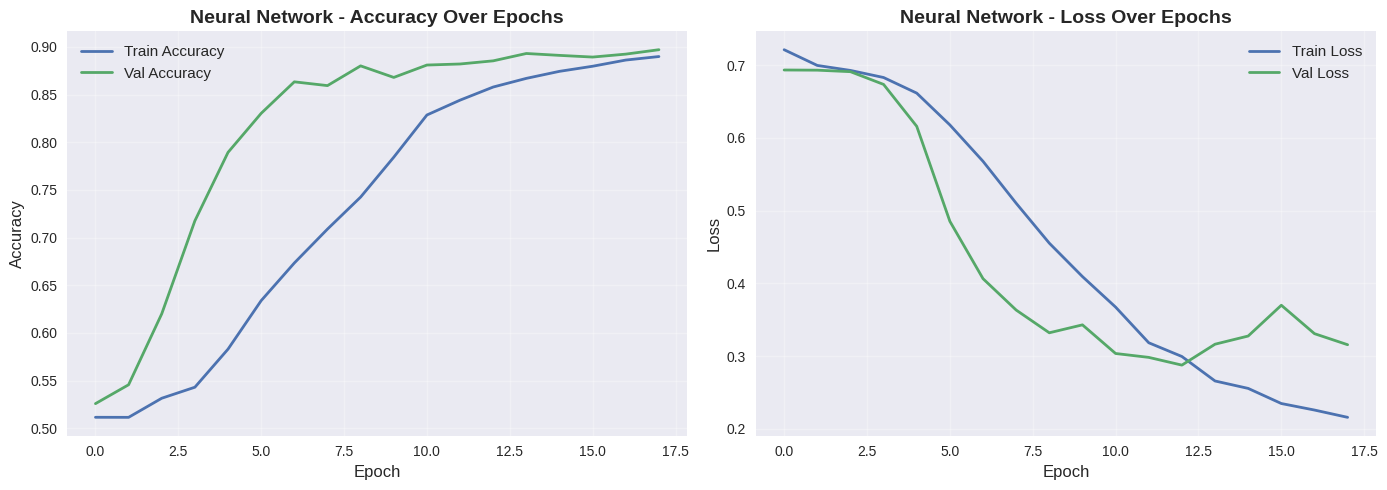

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0].set_title('Neural Network - Accuracy Over Epochs', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[1].set_title('Neural Network - Loss Over Epochs', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()